<a href="https://colab.research.google.com/github/mahalakshm1/banking-customer-segmentation/blob/main/banking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of our dataset:

   CustomerID  Age  Income  Balance  Transactions   Account_Type
0           1   55  127833    67842             9  Fixed Deposit
1           2   61   88097    76368            12  Fixed Deposit
2           3   30  148896     2046            13  Fixed Deposit
3           4   26   81756    49835            44        Savings
4           5   27   83697    20431            21  Fixed Deposit

Cluster assigned to each customer:

   CustomerID  Age  Income  Balance  Transactions  Cluster
0           1   55  127833    67842             9        0
1           2   61   88097    76368            12        0
2           3   30  148896     2046            13        3
3           4   26   81756    49835            44        1
4           5   27   83697    20431            21        3
5           6   29  115496    84070            31        2
6           7   23   78072    61797            37        1
7           8   33  117933    83075            40        2
8           

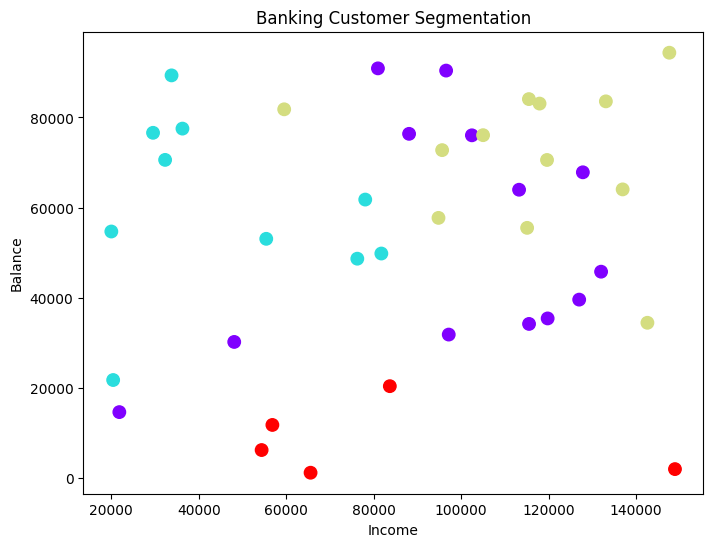


Cluster Averages:

           Age         Income       Balance  Transactions
Cluster                                                  
0        58.00   97739.769231  53645.153846     19.923077
1        31.70   46389.600000  60397.400000     36.300000
2        31.25  115285.583333  71505.916667     24.916667
3        32.20   81877.200000   8365.200000     12.600000


In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#banking data
np.random.seed(1)

data = {
    "CustomerID": range(1, 41),  # 1 to 40
    "Age": np.random.randint(18, 70, 40),  # random ages
    "Income": np.random.randint(20000, 150000, 40),  # yearly income
    "Balance": np.random.randint(1000, 100000, 40),  # bank balance
    "Transactions": np.random.randint(1, 50, 40),  # number of monthly transactions
    "Account_Type": np.random.choice(["Savings", "Current", "Fixed Deposit"], 40)  # account type
}

df = pd.DataFrame(data)

print("First 5 rows of our dataset:\n")
print(df.head())

#numbers for clustering
X = df[["Age", "Income", "Balance", "Transactions"]]

#Scale the numbers
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Use KMeans to make 4 groups (clusters) of customers
kmeans = KMeans(n_clusters=4, random_state=1)
df["Cluster"] = kmeans.fit_predict(X_scaled)

#Show results
print("\nCluster assigned to each customer:\n")
print(df[["CustomerID", "Age", "Income", "Balance", "Transactions", "Cluster"]].head(10))

#Plotting (Income vs Balance)
plt.figure(figsize=(8,6))
plt.scatter(df["Income"], df["Balance"], c=df["Cluster"], cmap="rainbow", s=80)
plt.xlabel("Income")
plt.ylabel("Balance")
plt.title("Banking Customer Segmentation")
plt.show()

#Average values of each cluster
print("\nCluster Averages:\n")
print(df.groupby("Cluster")[["Age", "Income", "Balance", "Transactions"]].mean())